In [1]:
# Test 3-1 Dataset 3 v2
# This test uses the new dataset 16000 images
# This test uses a simple CNN to classify between having an Square or a Circle

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-17 12:38:25.141383: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 12:38:25.141460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 12:38:25.173392: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-17 12:38:25.238290: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 12:38:26.187979: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_3/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_3/test'

In [4]:
IMG_SIZE = 250
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

985


In [5]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=True
    )

Found 11000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


2024-04-17 12:38:27.722895: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 12:38:27.723170: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-17 12:38:27.723294: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

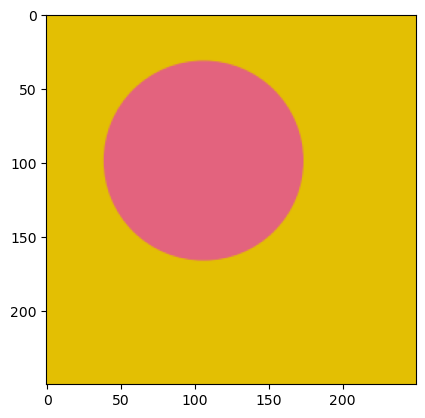

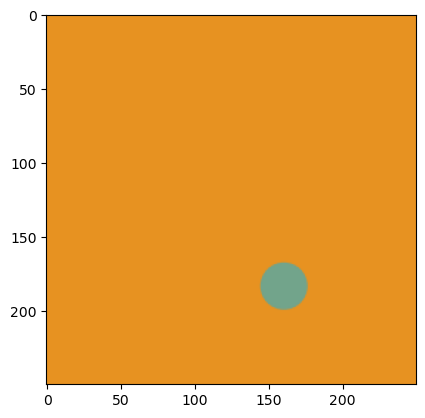

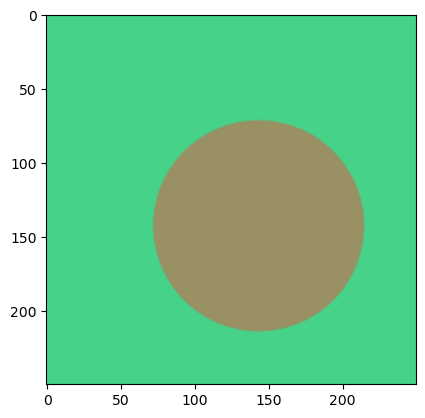

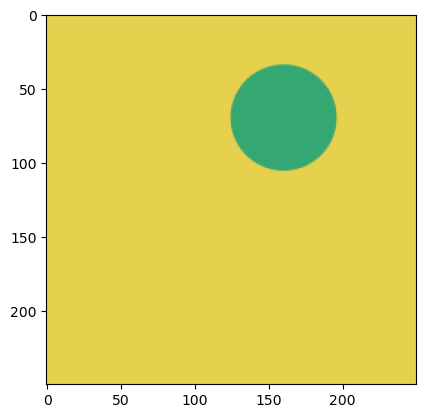

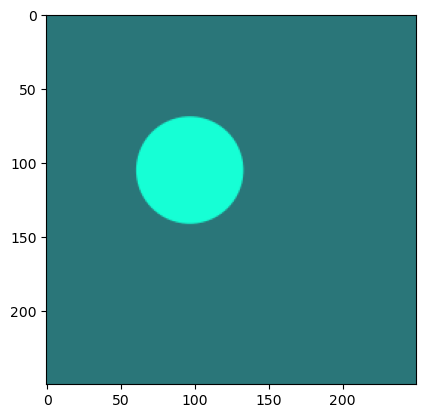

In [6]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [7]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [9]:
checkpoint_filepath = 'models/3-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [10]:
#Best Epoch = ?

history = model.fit(train_dataset, epochs=30, batch_size=32, validation_data=test_dataset, callbacks=[callbacks,early_stop])

Epoch 1/30


2024-04-17 12:38:34.602780: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-04-17 12:38:34.772253: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 12:38:35.618080: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-17 12:38:35.964207: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdad849a600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-17 12:38:35.964243: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-04-17 12:38:35.972712: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1713353916.017092   10821 devic

240/344 [===================>..........] - ETA: 4s - loss: 0.0552 - acc: 0.9900

KeyboardInterrupt: 

In [11]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 4s 23ms/step - loss: 0.1829 - acc: 0.9688
0.1829010546207428 0.9688000082969666


In [ ]:
model = keras.models.load_model('models/3-1/31-E.keras')

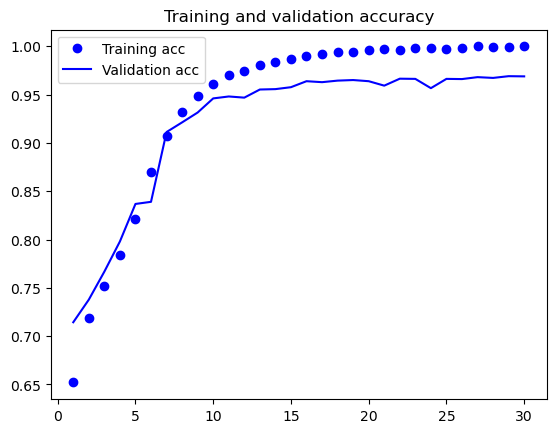

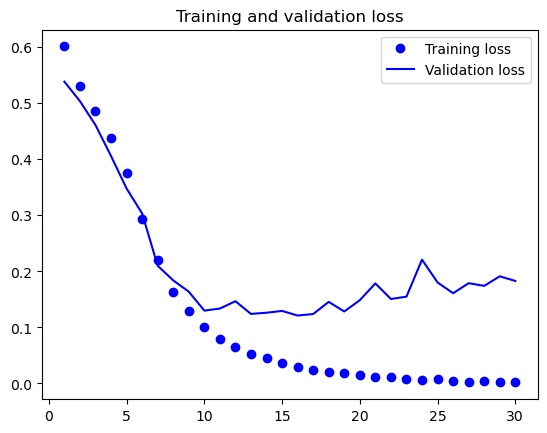

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/3-1/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/3-1/train_test_acc",dpi=100)
plt.show()


In [13]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/square/square_309.png', target_size=(IMG_SIZE, IMG_SIZE))

FileNotFoundError: [Errno 2] No such file or directory: '../../Generator/Dataset_B/test/square/square_309.png'

In [ ]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/none/none_1.png', target_size=(IMG_SIZE, IMG_SIZE))

In [ ]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

In [15]:
import csv
with open('results/3-1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 69ms/step


In [17]:
with open('results/3-1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['18', '0', '1']
['171', '1', '0']
['274', '0', '1']
['300', '1', '0']
['318', '1', '0']
['348', '0', '1']
['358', '1', '0']
['375', '1', '0']
['439', '0', '1']
['502', '0', '1']
['533', '0', '1']
['545', '0', '1']
['564', '0', '1']
['613', '0', '1']
['655', '0', '1']
['699', '1', '0']
['702', '0', '1']
['713', '0', '1']
['749', '0', '1']
['856', '1', '0']
['920', '0', '1']
['954', '1', '0']
['995', '1', '0']
['999', '1', '0']
['1032', '1', '0']
['1034', '1', '0']
['1045', '1', '0']
['1056', '1', '0']
['1103', '0', '1']
['1109', '0', '1']
['1124', '0', '1']
['1130', '1', '0']
['1149', '0', '1']
['1170', '1', '0']
['1202', '1', '0']
['1207', '0', '1']
['1214', '0', '1']
['1236', '0', '1']
['1293', '0', '1']
['1302', '0', '1']
['1421', '1', '0']
['1427', '1', '0']
['1441', '1', '0']
['1454', '1', '0']
['1468', '0', '1']
['1474', '0', '1']
['1489', '0', '1']
['1504', '0', '1']
['1565', '1', '0']
['1630', '0', '1']
['1649', '0', '1']
['1670', '0', '1']
['16

In [2]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

NameError: name 'image_dataset_from_directory' is not defined